## Question 2: Implement A* Algorithm

In [1]:
import time
import networkx as nx
import matplotlib.pyplot as plt
import heapq


In [2]:
edges = [
    (1,2,2), (1,5,1), (2,3,1), (2,6,3), (3,4,2), (4,8,1), (5,9,1), (6,5,5), (6,7,1), (6,10,4), (7,11,10), (8,7,5), 
    (8,12,15), (9,10,8), (10,11,3), (11,12,1), (7,3,4)
]

In [3]:
# node, heuristic value
heuristic_dict = [
    0, 12, 10, 16, 15, 12, 7, 11, 15,
    12, 4, 1, 0
]

In [4]:
def build_graph(edge_list):
    graph = {}
    for u, v, w in edge_list:
        graph.setdefault(u, []).append((v, w))
        graph.setdefault(v, []).append((u, w))
    return graph

In [5]:
def draw_graph_with_path(edges, path, title):
    G = nx.Graph()
    G.add_weighted_edges_from(edges)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="r", width=2)
    plt.title(title)
    plt.show()

In [6]:
def a_star_algorithm(start_node, stop_node, graph):
    open_list = []
    heapq.heappush(open_list, (0, start_node))
    closed_list = set()
    g = {start_node: 0}
    parents = {start_node: start_node}

    while open_list:
        _, current_node = heapq.heappop(open_list)

        if current_node == stop_node:
            path = []
            cost = g[current_node]
            while parents[current_node] != current_node:
                path.append(current_node)
                current_node = parents[current_node]
            path.append(start_node)
            path.reverse()
            return path, cost

        closed_list.add(current_node)

        for neighbor, weight in graph[current_node]:
            if neighbor in closed_list:
                continue

            tentative_g = g[current_node] + weight

            if neighbor not in g or tentative_g < g[neighbor]:
                g[neighbor] = tentative_g
                f = tentative_g + heuristic_dict[neighbor]
                heapq.heappush(open_list, (f, neighbor))
                parents[neighbor] = current_node

    return None, float('inf')


Path found: [1, 2, 6, 10, 11, 12]
Cost: 13


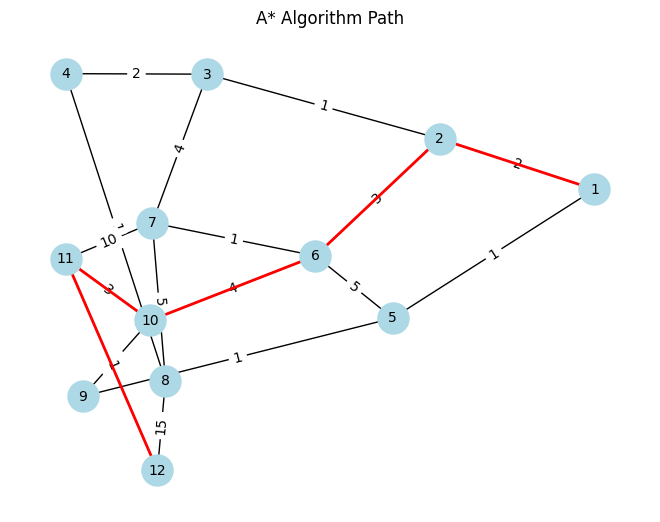

In [7]:
graph = build_graph(edges)

path, cost = a_star_algorithm(1, 12, graph)
print("Path found:", path)
print("Cost:", cost)
draw_graph_with_path(edges, path, "A* Algorithm Path")